In [9]:
#! pip install yellowbrick

In [1]:
import pandas as pd
from tqdm import tqdm
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import kagglehub
import os
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score


In [3]:
Path = kagglehub.dataset_download("devarajv88/walmart-sales-dataset")

print("Path to dataset files:", Path)

Path to dataset files: C:\Users\LENOVO\.cache\kagglehub\datasets\devarajv88\walmart-sales-dataset\versions\1


In [5]:
df_raw = pd.read_csv(f"{Path}/walmart.csv")


## EDA

### Numeric

In [13]:
df_raw.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3                          2               0                12      1057  
4                         4+               0                 8      7969

In [14]:
df_raw.describe().T

count          mean          std        min        25%  \
User_ID           550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation        550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status    550068.0  4.096530e-01     0.491770        0.0        0.0   
Product_Category  550068.0  5.404270e+00     3.936211        1.0        1.0   
Purchase          550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                        50%        75%        max  
User_ID           1003077.0  1004478.0  1006040.0  
Occupation              7.0       14.0       20.0  
Marital_Status          0.0        1.0        1.0  
Product_Category        5.0        8.0       20.0  
Purchase             8047.0    12054.0    23961.0

In [7]:
df_raw.columns
df= df_raw

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [18]:
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [19]:
for i in df.columns[1:]:
    print(i)
    print(df[i].unique())

Product_ID
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender
['F' 'M']
Age
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category
['A' 'C' 'B']
Stay_In_Current_City_Years
['2' '4+' '3' '1' '0']
Marital_Status
[0 1]
Product_Category
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase
[ 8370 15200  1422 ...   135   123   613]


In [20]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe().T

count          mean          std        min        25%  \
User_ID           550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation        550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status    550068.0  4.096530e-01     0.491770        0.0        0.0   
Product_Category  550068.0  5.404270e+00     3.936211        1.0        1.0   
Purchase          550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                        50%        75%        max  
User_ID           1003077.0  1004478.0  1006040.0  
Occupation              7.0       14.0       20.0  
Marital_Status          0.0        1.0        1.0  
Product_Category        5.0        8.0       20.0  
Purchase             8047.0    12054.0    23961.0

* The spendings are very different among the population. We can see that in the large standard deviation, but also in the wide gap between the min and max values of Purchase.
* We can detect a big jump in spending habits in the last 25% of the population. The high spenders are within the last quartile.


In [24]:
df.describe(include = 'object').T

count unique        top    freq
Product_ID                  550068   3631  P00265242    1880
Gender                      550068      2          M  414259
Age                         550068      7      26-35  219587
City_Category               550068      3          B  231173
Stay_In_Current_City_Years  550068      5          1  193821

* The column 'top' shows us the most present category in the data. 
* We can see that males make more purchases than females (in terms of number, not amount), the most active age group is people between 26 and 35.
* In the User_ID and Product_ID rows, we can see the most frequent client and most bought product.

### Exploratory Graphs

In [25]:
Custom_palette= ["#0D3B66", "#1A67A5", "#73D6EE", "#B8FFC6", "#2DC48D", "#1B7B3D"]

Distribution of Purchase per Gender

In [26]:
tot_pur_by_gen = df.groupby('Gender', as_index=False)['Purchase'].sum()
tot_pur_by_gen

Gender    Purchase
0      F  1186232642
1      M  3909580100

In [27]:
# 1. Distribution of Purchases by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y= "Purchase" , data=tot_pur_by_gen, palette=["#1A67A5", "#2DC48D" ])
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase USD')
plt.show()

Distribution of Purchase per Marital Status

In [28]:
tot_pur_by_ms = df.groupby('Marital_Status', as_index=False)['Purchase'].sum()
tot_pur_by_ms

Marital_Status    Purchase
0               0  3008927447
1               1  2086885295

In [29]:
sns.barplot(data = tot_pur_by_ms, y = 'Purchase', x = 'Marital_Status', palette=["#1A67A5", "#2DC48D" ])
plt.title('Total Sales by Marital_Status')
plt.show()

Distribution of Purchase per Age Group

In [30]:
tot_pur_by_age = df.groupby('Age', as_index=False)['Purchase'].sum()
tot_pur_by_age

Age    Purchase
0   0-17   134913183
1  18-25   913848675
2  26-35  2031770578
3  36-45  1026569884
4  46-50   420843403
5  51-55   367099644
6    55+   200767375

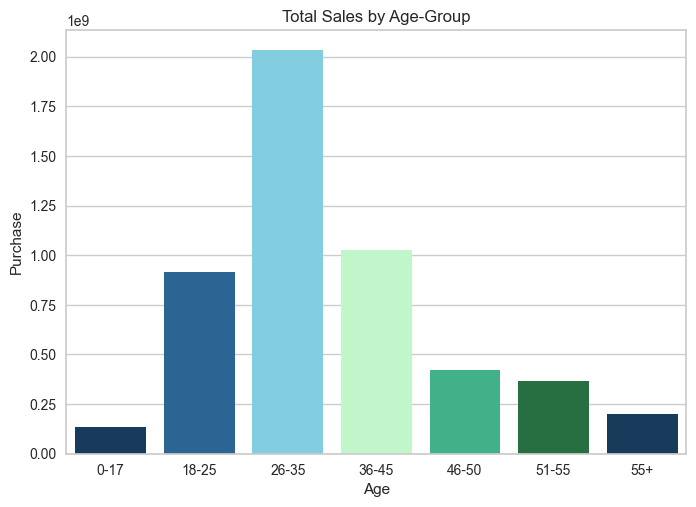

In [31]:
sns.barplot(data = tot_pur_by_age, x = 'Age', y = 'Purchase', palette=Custom_palette)
plt.title('Total Sales by Age-Group')
plt.show()

Distribution of Purchase per Occupation

In [32]:
tot_pur_by_occ = df.groupby('Occupation', as_index=False)['Purchase'].sum()
tot_pur_by_occ = tot_pur_by_occ.sort_values('Purchase', ascending = False, ignore_index = True)
tot_pur_by_occ['Occupation'] = tot_pur_by_occ['Occupation'].astype('str')
tot_pur_by_occ

Occupation   Purchase
0           4  666244484
1           0  635406958
2           7  557371587
3           1  424614144
4          17  393281453
5          12  305449446
6          20  296570442
7          14  259454692
8          16  238346955
9           2  238028583
10          6  188416784
11          3  162002168
12         15  118960211
13         10  115844465
14          5  113649759
15         11  106751618
16         19   73700617
17         13   71919481
18         18   60721461
19          9   54340046
20          8   14737388

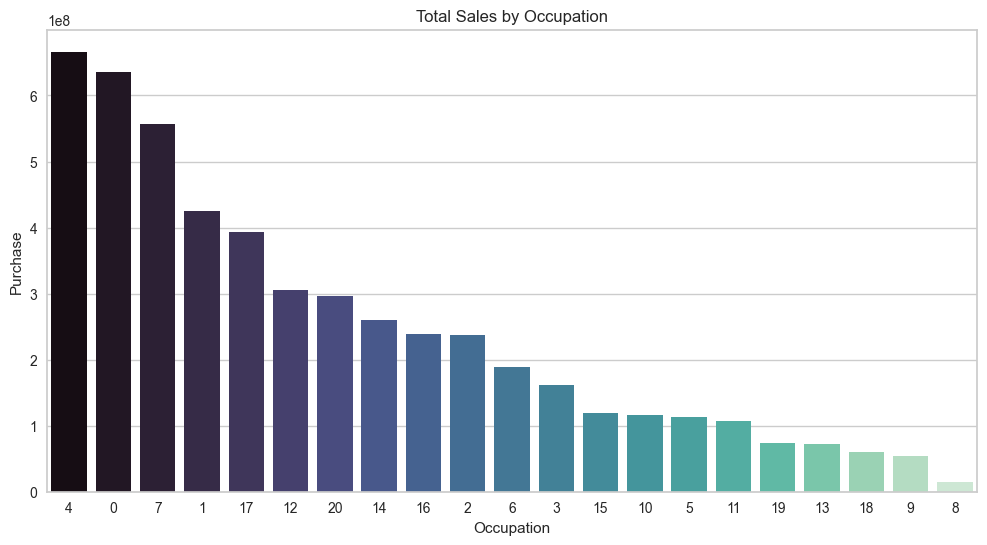

In [33]:
plt.figure(figsize=[12,6])
sns.barplot(x = tot_pur_by_occ['Occupation'], y = tot_pur_by_occ['Purchase'], palette="mako")
plt.title('Total Sales by Occupation')
plt.show()

Distribution of Purchase per City Category

In [34]:
tot_pur_by_city = df.groupby('City_Category', as_index=False)['Purchase'].sum()
tot_pur_by_city

City_Category    Purchase
0             A  1316471661
1             B  2115533605
2             C  1663807476

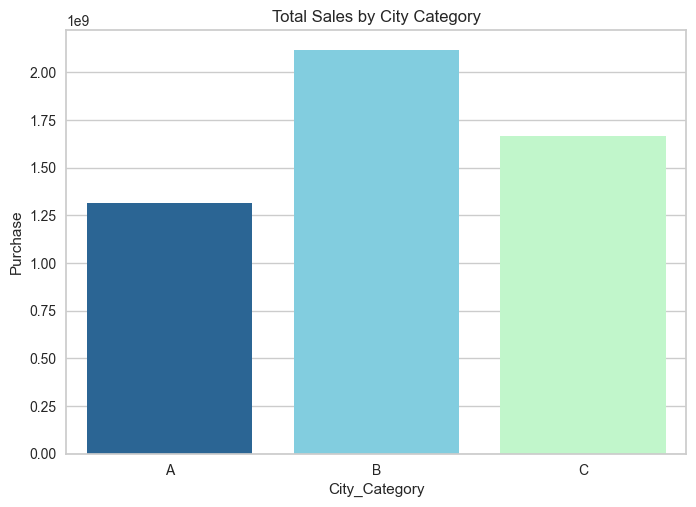

In [35]:
sns.barplot(x = tot_pur_by_city['City_Category'], y = tot_pur_by_city['Purchase'], palette=Custom_palette[1:])
plt.title('Total Sales by City Category')
plt.show()

Distribution of Purchase per number of years lived in the city

In [36]:
sal_by_cust_stay = df.groupby('Stay_In_Current_City_Years', as_index=False)['Purchase'].sum()
sal_by_cust_stay

Stay_In_Current_City_Years    Purchase
0                          0   682979229
1                          1  1792872533
2                          2   949173931
3                          3   884902659
4                         4+   785884390

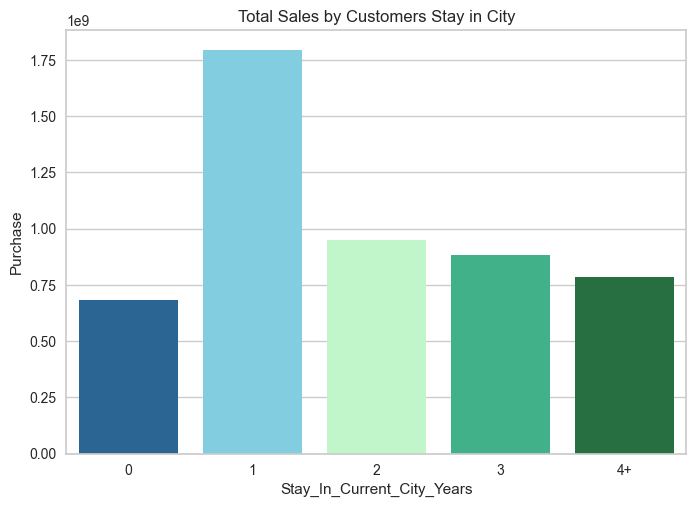

In [37]:
sns.barplot(x = sal_by_cust_stay['Stay_In_Current_City_Years'], y = sal_by_cust_stay['Purchase'], palette=Custom_palette[1:])
plt.title('Total Sales by Customers Stay in City')
plt.show()

Distribution of Purchase per Product Category

In [38]:
tot_pur_by_pc = df.groupby('Product_Category', as_index=False)['Purchase'].sum()
tot_pur_by_pc = tot_pur_by_pc.sort_values('Purchase', ascending = False, ignore_index = True)
tot_pur_by_pc['Product_Category'] = tot_pur_by_pc['Product_Category'].astype('str')
tot_pur_by_pc

Product_Category    Purchase
0                 1  1910013754
1                 5   941835229
2                 8   854318799
3                 6   324150302
4                 2   268516186
5                 3   204084713
6                16   145120612
7                11   113791115
8                10   100837301
9                15    92969042
10                7    60896731
11                4    27380488
12               14    20014696
13               18     9290201
14                9     6370324
15               17     5878699
16               12     5331844
17               13     4008601
18               20      944727
19               19       59378

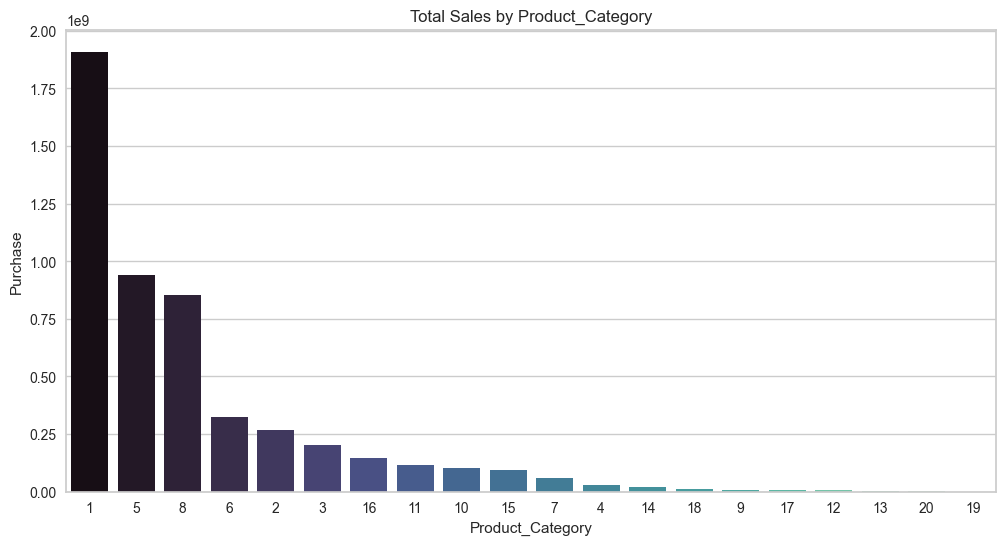

In [39]:
plt.figure(figsize=[12,6])
sns.barplot(x = tot_pur_by_pc['Product_Category'], y = tot_pur_by_pc['Purchase'], palette='mako')
plt.title('Total Sales by Product_Category')
plt.show()

Distribution of Purchase

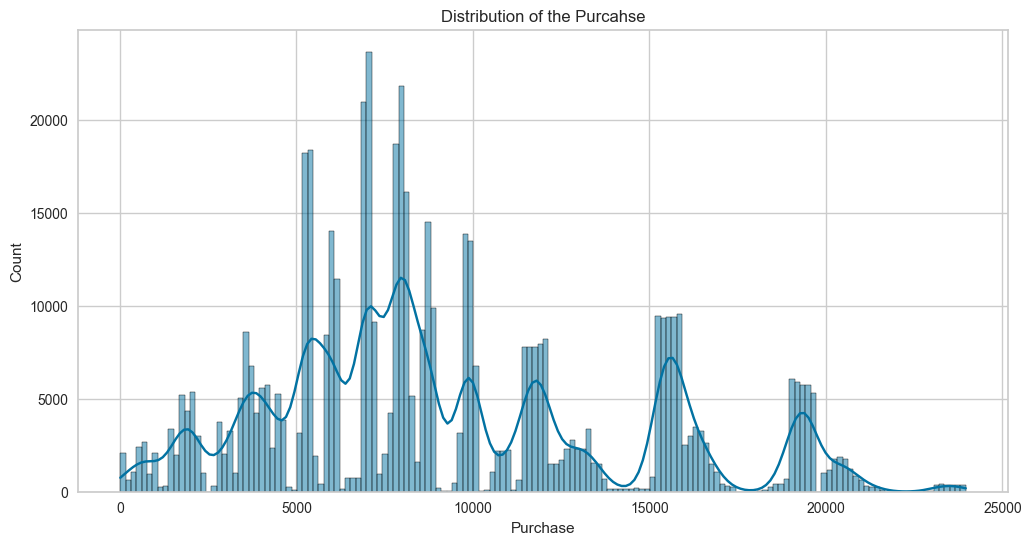

In [40]:
plt.figure(figsize=[12,6])
sns.histplot(data = df, x = "Purchase", kde= True)
plt.title("Distribution of the Purcahse")
plt.show()

## Feature Engineering

### Feature Augmentation

As our final purpose is to study the cutomer behavior, we think it's primilary to add more characteristics that are cutomer_related rather than purchase_related. Therefore, we will be infering new features based on what we have. 

** Most Purchased Product_Category per customer **


In [9]:
Prod_dat_per_cust= df.groupby(["User_ID", "Product_Category"], as_index=False)['Purchase'].sum().sort_values("Purchase", ascending=False)

In [11]:
Prod_dat_per_cust

User_ID  Product_Category  Purchase
39944  1004277                 1   3223889
26902  1002909                 1   3103071
41542  1004448                 1   2782501
21492  1002304                 1   2503405
33770  1003626                 1   2484123
...        ...               ...       ...
42435  1004534                19        12
12187  1001322                19        12
9496   1001049                19        12
7059   1000775                19        12
19888  1002128                19        12

[56782 rows x 3 columns]

In [13]:
Customers_list = list(Prod_dat_per_cust.User_ID.unique())

cust_prodcat_dict = {}
cust_spent_per_prodcat = {}
tot_spend_per_cust = {}

for person in Customers_list:
    cust_df = Prod_dat_per_cust[Prod_dat_per_cust["User_ID"] == person]
    # Calculate total spend
    sum_spent = cust_df["Purchase"].sum()
    tot_spend_per_cust[person] = sum_spent  # Direct assignment
    # Get top 2 Product_Category and their Purchase amounts
    top2 = cust_df.nlargest(2, "Purchase")  
    product_categories = top2["Product_Category"].tolist()  
    purchase_amounts = top2["Purchase"].tolist() 
    # Append dictionaries
    cust_prodcat_dict[person] = product_categories
    cust_spent_per_prodcat[person] = purchase_amounts


In [15]:
df["Purchase_Sum"] = df["User_ID"].map(tot_spend_per_cust)
df["Top1Cat"] = df["User_ID"].map(lambda x: cust_prodcat_dict.get(x, [None, None])[0])
df["SpentonTop1"] = df["User_ID"].map(lambda x: cust_spent_per_prodcat.get(x, [None, None])[0])
df["Top2Cat"] = df["User_ID"].map(lambda x: cust_prodcat_dict.get(x, [None, None])[-1])
df["SpentonTop2"] = df["User_ID"].map(lambda x: cust_spent_per_prodcat.get(x, [None, None])[-1])

In [17]:
df.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                          2               0                 3      8370   
1                          2               0                 1     15200   
2                          2               0                12      1422   
3                          2               0                12      1057   
4                         4+               0                 8      7969   

   Purchase_Sum  Top1Cat  SpentonTop1  Top2Cat  SpentonTop2  
0        334093        3       119859        8        69542  
1        334093        3       119859        8        69542  
2        334093        3       119859        8        69542  
3        334093        3       119859        8        69542  
4        810472        1       413669        8       210329

Outliers

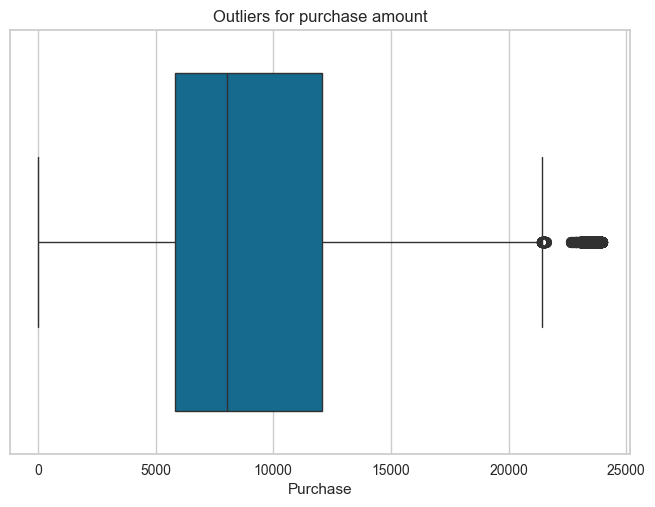

In [46]:
sns.boxplot(x=df['Purchase'])
plt.title('Outliers for purchase amount')
plt.show()

In [47]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < seuil_bas) |
                       (df['Purchase'] > seuil_haut)]


In [48]:
len(outliers)

2677

### Encoding and Scaling

In [19]:
df2 = df_raw.drop(columns=['User_ID', 'Product_ID'])

In [21]:
def Encoder(df):
    if 'Gender' in df.columns:
        le = LabelEncoder()
        df['Gender'] = le.fit_transform(df['Gender'])
    
    if 'Age' in df.columns and df['Age'].dtype == 'object':
        df['Age'] = le.fit_transform(df['Age'])
    
    if 'City_Category' in df.columns:
        onehot = OneHotEncoder(sparse_output=False, drop='first')
        city_encoded = onehot.fit_transform(df[['City_Category']])
        city_encoded_df = pd.DataFrame(city_encoded, columns=onehot.get_feature_names_out(['City_Category']), index=df.index)
        df = pd.concat([df, city_encoded_df], axis=1)
        df.drop("City_Category", axis=1, inplace=True)
    
    if 'Stay_In_Current_City_Years' in df.columns:
        df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace({"4+": "4"}).astype(int)
    
    return df

In [23]:
#Normalisation of df2
df2= Encoder(df2)

In [25]:
df2.head()

Gender  Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0       0    0          10                           2               0   
1       0    0          10                           2               0   
2       0    0          10                           2               0   
3       0    0          10                           2               0   
4       1    6          16                           4               0   

   Product_Category  Purchase  Purchase_Sum  Top1Cat  SpentonTop1  Top2Cat  \
0                 3      8370        334093        3       119859        8   
1                 1     15200        334093        3       119859        8   
2                12      1422        334093        3       119859        8   
3                12      1057        334093        3       119859        8   
4                 8      7969        810472        1       413669        8   

   SpentonTop2  City_Category_B  City_Category_C  
0        69542              0.0              0.0  
1        69542              0.0              0.0  
2        69542              0.0              0.0  
3        69542              0.0              0.0  
4       210329              0.0              1.0

In [27]:
def Scaler_data(df):
    if 'User_ID' in df.columns:
        df = df.drop(columns=['User_ID'])
    if 'Product_ID' in df.columns:
        df = df.drop(columns=['Product_ID'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

In [29]:
scaled_data = Scaler_data(df2) #scaled_data: contains the added new features
print(scaled_data)

[[-1.74651251 -1.84424754  0.29486356 ... -0.99791776 -0.85142167
  -0.67214331]
 [-1.74651251 -1.84424754  0.29486356 ... -0.99791776 -0.85142167
  -0.67214331]
 [-1.74651251 -1.84424754  0.29486356 ... -0.99791776 -0.85142167
  -0.67214331]
 ...
 [-1.74651251 -0.36673935  1.06142262 ...  1.80156917  1.17450616
  -0.67214331]
 [-1.74651251  2.58827703 -1.08494277 ... -1.12101261 -0.85142167
   1.48777797]
 [-1.74651251  1.11076884 -1.23825458 ... -0.84750676  1.17450616
  -0.67214331]]


In [31]:
corr_matrix = df2.corr()
corr_matrix

Gender       Age  Occupation  \
Gender                      1.000000 -0.004262    0.117291   
Age                        -0.004262  1.000000    0.091463   
Occupation                  0.117291  0.091463    1.000000   
Stay_In_Current_City_Years  0.014660 -0.004712    0.030005   
Marital_Status             -0.011603  0.311738    0.024280   
Product_Category           -0.045594  0.061197   -0.007618   
Purchase                    0.060346  0.015839    0.020833   
Purchase_Sum                0.108409 -0.053110    0.003933   
Top1Cat                    -0.271009  0.166888   -0.047571   
SpentonTop1                 0.185911 -0.064405    0.014356   
Top2Cat                     0.062277  0.025602    0.009144   
SpentonTop2                 0.038479 -0.049572   -0.018302   
City_Category_B            -0.006155 -0.017950   -0.011673   
City_Category_C            -0.000426  0.110616    0.034529   

                            Stay_In_Current_City_Years  Marital_Status  \
Gender                                        0.014660       -0.011603   
Age                                          -0.004712        0.311738   
Occupation                                    0.030005        0.024280   
Stay_In_Current_City_Years                    1.000000       -0.012819   
Marital_Status                               -0.012819        1.000000   
Product_Category                             -0.004213        0.019888   
Purchase                                      0.005422       -0.000463   
Purchase_Sum                                 -0.001142       -0.003875   
Top1Cat                                      -0.022589        0.057230   
SpentonTop1                                   0.011383       -0.018071   
Top2Cat                                       0.020586        0.021032   
SpentonTop2                                   0.000284       -0.007678   
City_Category_B                               0.011008       -0.001863   
City_Category_C                               0.010507        0.033661   

                            Product_Category  Purchase  Purchase_Sum  \
Gender                             -0.045594  0.060346      0.108409   
Age                                 0.061197  0.015839     -0.053110   
Occupation                         -0.007618  0.020833      0.003933   
Stay_In_Current_City_Years         -0.004213  0.005422     -0.001142   
Marital_Status                      0.019888 -0.000463     -0.003875   
Product_Category                    1.000000 -0.343703      0.003524   
Purchase                           -0.343703  1.000000     -0.038439   
Purchase_Sum                        0.003524 -0.038439      1.000000   
Top1Cat                             0.144381 -0.094676     -0.186456   
SpentonTop1                        -0.066749  0.012233      0.901483   
Top2Cat                             0.010990  0.047959      0.040591   
SpentonTop2                         0.026525 -0.072687      0.942938   
City_Category_B                    -0.006076 -0.019098      0.133274   
City_Category_C                    -0.008554  0.061012     -0.483759   

                             Top1Cat  SpentonTop1   Top2Cat  SpentonTop2  \
Gender                     -0.271009     0.185911  0.062277     0.038479   
Age                         0.166888    -0.064405  0.025602    -0.049572   
Occupation                 -0.047571     0.014356  0.009144    -0.018302   
Stay_In_Current_City_Years -0.022589     0.011383  0.020586     0.000284   
Marital_Status              0.057230    -0.018071  0.021032    -0.007678   
Product_Category            0.144381    -0.066749  0.010990     0.026525   
Purchase                   -0.094676     0.012233  0.047959    -0.072687   
Purchase_Sum               -0.186456     0.901483  0.040591     0.942938   
Top1Cat                     1.000000    -0.312173 -0.424103    -0.091560   
SpentonTop1                -0.312173     1.000000  0.071263     0.765556   
Top2Cat                    -0.424103     0.071263  1.000000    -0.00763

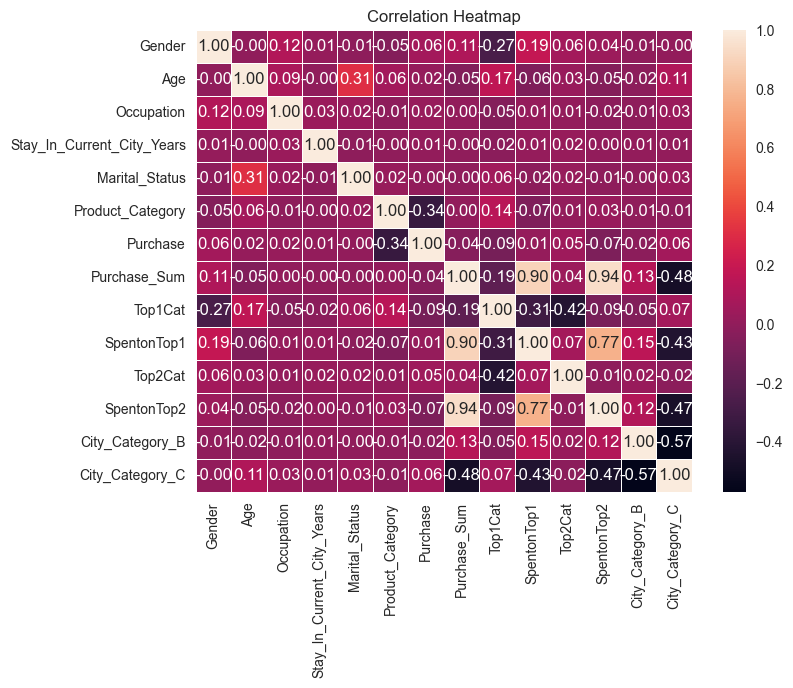

In [141]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Backward Elimination

In [142]:
# Scale numerical features using MinMaxScaler

processed_data = pd.DataFrame(scaled_data, columns=df2.columns) 

In [143]:
columns_= processed_data.columns

In [144]:
processed_data.head()

Gender       Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0 -1.746513 -1.844248    0.294864                    0.109801       -0.833018   
1 -1.746513 -1.844248    0.294864                    0.109801       -0.833018   
2 -1.746513 -1.844248    0.294864                    0.109801       -0.833018   
3 -1.746513 -1.844248    0.294864                    0.109801       -0.833018   
4  0.572570  2.588277    1.214734                    1.660861       -0.833018   

   Product_Category  Purchase  Purchase_Sum   Top1Cat  SpentonTop1   Top2Cat  \
0         -0.610809 -0.177973     -1.068006  0.079647    -1.144039  0.927826   
1         -1.118912  1.181756     -1.068006  0.079647    -1.144039  0.927826   
2          1.675656 -1.561193     -1.068006  0.079647    -1.144039  0.927826   
3          1.675656 -1.633858     -1.068006  0.079647    -1.144039  0.927826   
4          0.659449 -0.257805     -0.748267 -0.631516    -0.606467  0.927826   

   SpentonTop2  City_Category_B  City_Category_C  
0    -0.997918        -0.851422        -0.672143  
1    -0.997918        -0.851422        -0.672143  
2    -0.997918        -0.851422        -0.672143  
3    -0.997918        -0.851422        -0.672143  
4    -0.565032        -0.851422         1.487778

In [146]:
def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

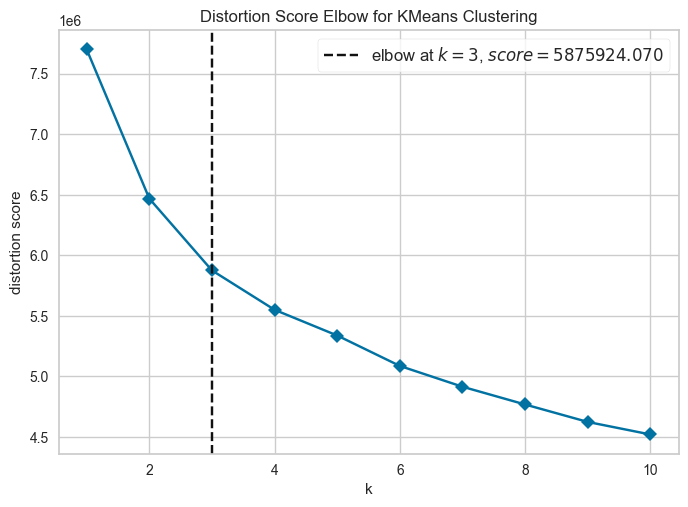

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [147]:
elbow_visualizer1 = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1, 11), timings=False)
elbow_visualizer1.fit(processed_data)
elbow_visualizer1.show()

In [148]:
def least_inertia_same_nbr(clust_num, combs, processed_data):
   
    inertie = []

    for to_remove in combs:
        dropped = processed_data.drop(columns=to_remove, axis=1)
        #print(f"Dropping columns: {to_remove}")
        #print(f"Remaining data:\n{dropped.head()}")
        kms = KMeans(n_clusters=clust_num, random_state=42)
        kms.fit(dropped)

        inertie.append(kms.inertia_)

    ind_best_var = inertie.index(min(inertie))
    best_set = combs[ind_best_var]

    return best_set, min(inertie)

In [149]:
subdata=  processed_data.sample(frac=0.1, random_state=42)

In [150]:

Erreur = []
best_set = []

for i in tqdm(range(1, len(columns_))):
    combi = [list(c) for c in combinations(columns_, i)]
    
    col, err = least_inertia_same_nbr(5, combi, subdata) #We chose num of Cluster=5 based on the previous Distorition Score Elbow ran on the whole dataset
    
    best_set.append(col)
    Erreur.append(err)

print("Best column sets to drop for each subset size:", best_set)
print("Corresponding inertia values:", Erreur)


100%|██████████| 13/13 [19:21<00:00, 89.32s/it] 

Best column sets to drop for each subset size: [['Stay_In_Current_City_Years'], ['Stay_In_Current_City_Years', 'Marital_Status'], ['Occupation', 'Stay_In_Current_City_Years', 'Product_Category'], ['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase'], ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'], ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase'], ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase'], ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase', 'Top1Cat', 'Top2Cat'], ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase', 'Top1Cat', 'Top2Cat', 'City_Category_B'], ['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase', 'Top1Cat', 'SpentonTop1', 'Top2Cat

Text(0, 0.5, 'Inertia')

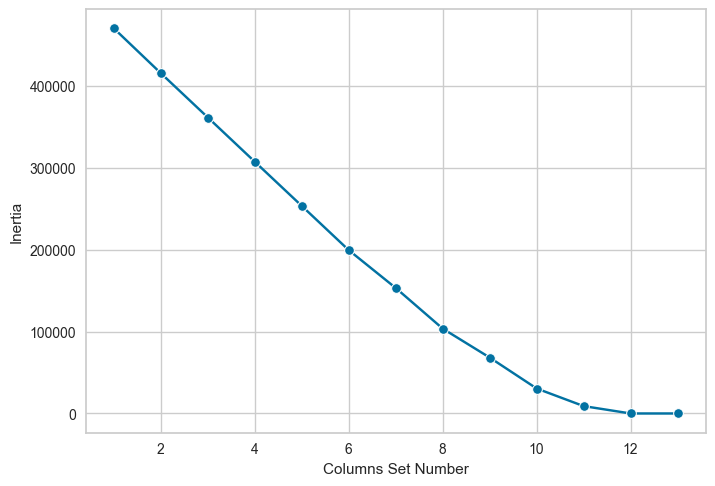

In [151]:
ind_col= [i for i in range(1,len(best_set)+1)]
plot = sns.lineplot(x=ind_col, y=Erreur, marker = 'o')
plot.set_xlabel("Columns Set Number")
plot.set_ylabel("Inertia")

In [155]:
best_set[6]

['Gender',
 'Age',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

In [118]:
kept_data= processed_data.drop(best_set[3], axis=1)

In [119]:
kept_data.head()

Age  Product_Category  Purchase  Purchase_Sum   Top1Cat  SpentonTop1  \
0  0.0          0.105263  0.348992      0.027398  0.133333     0.032532   
1  0.0          0.000000  0.634181      0.027398  0.133333     0.032532   
2  0.0          0.578947  0.058875      0.027398  0.133333     0.032532   
3  0.0          0.578947  0.043634      0.027398  0.133333     0.032532   
4  1.0          0.368421  0.332248      0.072810  0.000000     0.124107   

    Top2Cat  SpentonTop2  City_Category_B  City_Category_C  
0  0.368421     0.030339              0.0              0.0  
1  0.368421     0.030339              0.0              0.0  
2  0.368421     0.030339              0.0              0.0  
3  0.368421     0.030339              0.0              0.0  
4  0.368421     0.091793              0.0              1.0

In [120]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(kept_data)


KMeans(n_clusters=4, random_state=42)

Predict clusters on all the population

In [122]:
processed_data['Cluster'] = kmeans.fit_predict(processed_data)
processed_data.head(10)

Gender       Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0     0.0  0.000000        0.50                        0.50             0.0   
1     0.0  0.000000        0.50                        0.50             0.0   
2     0.0  0.000000        0.50                        0.50             0.0   
3     0.0  0.000000        0.50                        0.50             0.0   
4     1.0  1.000000        0.80                        1.00             0.0   
5     1.0  0.333333        0.75                        0.75             0.0   
6     1.0  0.666667        0.35                        0.50             1.0   
7     1.0  0.666667        0.35                        0.50             1.0   
8     1.0  0.666667        0.35                        0.50             1.0   
9     1.0  0.333333        1.00                        0.25             1.0   

   Product_Category  Purchase  Purchase_Sum   Top1Cat  SpentonTop1   Top2Cat  \
0          0.105263  0.348992      0.027398  0.133333     0.032532  0.368421   
1          0.000000  0.634181      0.027398  0.133333     0.032532  0.368421   
2          0.578947  0.058875      0.027398  0.133333     0.032532  0.368421   
3          0.578947  0.043634      0.027398  0.133333     0.032532  0.368421   
4          0.368421  0.332248      0.072810  0.000000     0.124107  0.368421   
5          0.000000  0.635308      0.028117  0.000000     0.066418  0.210526   
6          0.000000  0.801829      0.015232  0.000000     0.059377  1.000000   
7          0.000000  0.661489      0.015232  0.000000     0.059377  1.000000   
8          0.000000  0.654474      0.015232  0.000000     0.059377  1.000000   
9          0.368421  0.328156      0.073813  0.466667     0.076383  0.000000   

   SpentonTop2  City_Category_B  City_Category_C  Cluster  
0     0.030339              0.0              0.0        3  
1     0.030339              0.0              0.0        3  
2     0.030339              0.0              0.0        3  
3     0.030339              0.0              0.0        3  
4     0.091793              0.0              1.0        2  
5     0.027670              0.0              0.0        2  
6     0.000194              1.0              0.0        0  
7     0.000194              1.0              0.0        0  
8     0.000194              1.0              0.0        0  
9     0.084840              0.0              0.0        2

In [123]:

cluster_analysis = processed_data.groupby('Cluster').mean(numeric_only = True)
print(cluster_analysis)

           Gender       Age  Occupation  Stay_In_Current_City_Years  \
Cluster                                                               
0        1.000000  0.411130    0.416615                    0.473013   
1        0.563068  0.513327    0.409041                    0.461400   
2        1.000000  0.380821    0.427368                    0.462806   
3        0.000000  0.394772    0.327842                    0.455917   

         Marital_Status  Product_Category  Purchase  Purchase_Sum   Top1Cat  \
Cluster                                                                       
0              0.410568          0.224758  0.390115      0.211414  0.076859   
1              0.767701          0.238099  0.399727      0.073852  0.164401   
2              0.228967          0.226790  0.390663      0.197481  0.089993   
3              0.397283          0.248342  0.356741      0.191450  0.204414   

         SpentonTop1   Top2Cat  SpentonTop2  City_Category_B  City_Category_C  
Cluster           

In [125]:
sample_data= processed_data.sample(frac= 0.1, random_state=42)

In [127]:
sns.pairplot(sample_data.drop(best_set[3], axis=1)[0:], hue='Cluster')

## PCA

In [33]:
def Apply_PCA(scaled_data):
    pca = PCA()
    pca.fit(scaled_data)
    exp_var_ratio = pca.explained_variance_ratio_
    #scores = pca.transform(scaled_data)
    return exp_var_ratio

In [35]:
exp_var_ratio1 = Apply_PCA(scaled_data)
per_var_ratio1 = np.round(exp_var_ratio1*100, decimals = 1)
print(exp_var_ratio1)
print(per_var_ratio1)

[0.23158396 0.11820579 0.09738264 0.08893737 0.08812036 0.0748248
 0.07065836 0.06099346 0.05097767 0.04529543 0.03417436 0.02367392
 0.01371821 0.00145365]
[23.2 11.8  9.7  8.9  8.8  7.5  7.1  6.1  5.1  4.5  3.4  2.4  1.4  0.1]


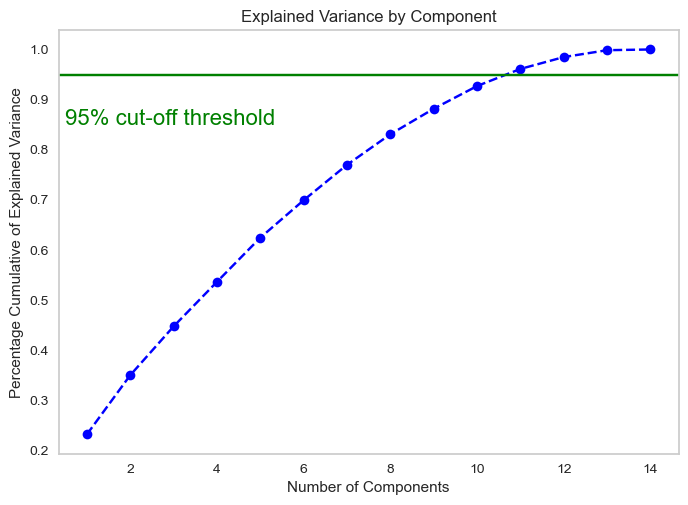

In [37]:
plt.plot(range(1, len(exp_var_ratio1)+1), exp_var_ratio1.cumsum(), marker = "o", linestyle = "--", color ='blue')
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.axhline(y=0.95, color='green', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'green', fontsize=16)
plt.show()

In [39]:
cumulative_variance = np.cumsum(exp_var_ratio1)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
n_components

11

In [43]:
scaled_data.shape

(550068, 14)

In [45]:
# data with new vars : scaled_data
pca2 = PCA(n_components = 11)
pca2.fit(scaled_data)

principal_components2 = pd.DataFrame(pca2.components_, columns=df2.columns, index=[f"PC{i+1}" for i in range(len(pca2.components_))])
print("Principal Components (Loadings):")
principal_components2.T

Principal Components (Loadings):


PC1       PC2       PC3       PC4       PC5  \
Gender                      0.098753 -0.350636  0.171206  0.145139  0.025190   
Age                        -0.075149  0.141654  0.616858 -0.211540  0.170793   
Occupation                 -0.000796 -0.120747  0.278330  0.008430  0.067755   
Stay_In_Current_City_Years  0.004896 -0.055351  0.006938  0.040107  0.051942   
Marital_Status             -0.027577  0.106857  0.569242 -0.231155  0.206401   
Product_Category           -0.019986  0.369895  0.100774  0.545087  0.238748   
Purchase                   -0.019801 -0.378944  0.004221 -0.543691 -0.193022   
Purchase_Sum                0.524155  0.067535  0.131795  0.047907 -0.200775   
Top1Cat                    -0.180401  0.553524  0.018172 -0.213445 -0.217440   
SpentonTop1                 0.502530 -0.055446  0.117034  0.032792 -0.159053   
Top2Cat                     0.064934 -0.399849  0.098246  0.245535  0.437855   
SpentonTop2                 0.492017  0.145151  0.110040  0.041243 -0.221044   
City_Category_B             0.192853  0.136462 -0.269685 -0.351324  0.595871   
City_Category_C            -0.373786 -0.184151  0.229261  0.228053 -0.342811   

                                 PC6       PC7       PC8       PC9      PC10  \
Gender                     -0.376255 -0.282089 -0.697881  0.138596  0.006781   
Age                         0.049325  0.032088 -0.003661  0.504854 -0.440119   
Occupation                 -0.681241 -0.251510  0.586687 -0.157076  0.075602   
Stay_In_Current_City_Years -0.404252  0.903903 -0.106960 -0.010972  0.004837   
Marital_Status              0.218272  0.066199 -0.194731 -0.601562  0.334921   
Product_Category           -0.032588 -0.032386 -0.031854  0.331891  0.581365   
Purchase                    0.060177  0.049599  0.077140  0.401971  0.586376   
Purchase_Sum                0.045305  0.034861  0.056966  0.032061  0.014822   
Top1Cat                    -0.115999  0.008891  0.005562  0.189418  0.053545   
SpentonTop1                 0.020711  0.017913 -0.006360  0.008422 -0.025154   
Top2Cat                     0.359024  0.137050  0.306443  0.165383 -0.021066   
SpentonTop2                 0.054679  0.053583  0.083311  0.031929  0.010978   
City_Category_B            -0.151868 -0.073125 -0.090237  0.046499 -0.027062   
City_Category_C             0.072632  0.050904  0.010680  0.000262 -0.038725   

                                PC11  
Gender                      0.290955  
Age                        -0.222267  
Occupation                  0.036021  
Stay_In_Current_City_Years  0.005194  
Marital_Status              0.059494  
Product_Category           -0.214045  
Purchase                   -0.064640  
Purchase_Sum                0.028534  
Top1Cat                     0.662405  
SpentonTop1                -0.129821  
Top2Cat                     0.538736  
SpentonTop2                 0.099443  
City_Category_B            -0.152792  
City_Category_C            -0.176538

In [47]:
# Obtain Eigenvalues
eig_values = pca2.explained_variance_
print("Eigenvalues :", eig_values)


Eigenvalues : [3.24218139 1.65488404 1.36335947 1.24512548 1.23368727 1.04754916
 0.98921887 0.85391003 0.71368874 0.63413723 0.47844191]


In [49]:
# Create a diagonal matrix of eigenvalues
eig_matrix = np.diag(eig_values)
print("Matrix of eigenvalues :\n", eig_matrix)

Matrix of eigenvalues :
 [[3.24218139 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         1.65488404 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.36335947 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.24512548 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.23368727 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.04754916
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.98921887 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.85391003 0.         0.         0.        ]
 [0.         0.        

In [51]:
total_variance = np.sum(eig_values)

explained_variance = (eig_values / total_variance) * 100

cumulative_variance = np.cumsum(explained_variance)

for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: Explained variance = {var:.2f}%, Cumulative variance = {cum_var:.2f}%")

PC1: Explained variance = 24.09%, Cumulative variance = 24.09%
PC2: Explained variance = 12.30%, Cumulative variance = 36.39%
PC3: Explained variance = 10.13%, Cumulative variance = 46.52%
PC4: Explained variance = 9.25%, Cumulative variance = 55.78%
PC5: Explained variance = 9.17%, Cumulative variance = 64.95%
PC6: Explained variance = 7.78%, Cumulative variance = 72.73%
PC7: Explained variance = 7.35%, Cumulative variance = 80.08%
PC8: Explained variance = 6.35%, Cumulative variance = 86.43%
PC9: Explained variance = 5.30%, Cumulative variance = 91.73%
PC10: Explained variance = 4.71%, Cumulative variance = 96.44%
PC11: Explained variance = 3.56%, Cumulative variance = 100.00%


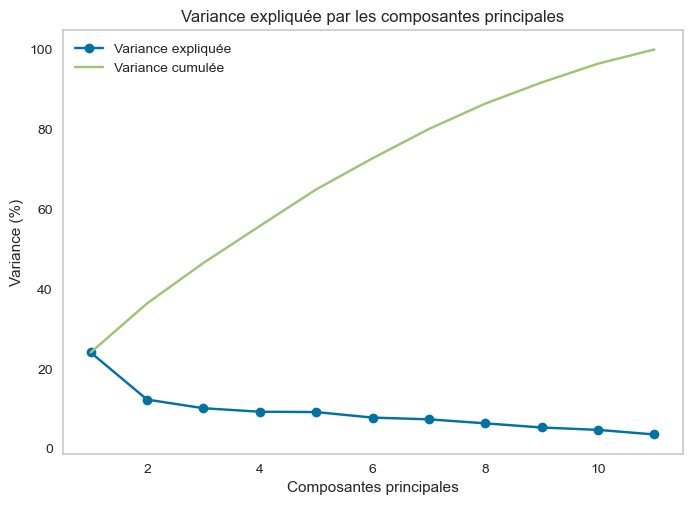

In [53]:

plt.plot(range(1, len(eig_values) + 1), explained_variance, marker='o', label='Variance expliquée')
plt.plot(range(1, len(eig_values) + 1), cumulative_variance, marker='x', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Variance (%)')
plt.title('Variance expliquée par les composantes principales')
plt.legend()
plt.grid()
plt.show()


In [67]:
# on a remarqué que la vaiance cumulée expliqué des 6 premiers composantes atteint 70% => réduction à 6 PCs 

In [55]:
pca2 = PCA(n_components = 6)
pca2.fit(scaled_data)

principal_components2 = pd.DataFrame(pca2.components_, columns=df2.columns, index=[f"PC{i+1}" for i in range(len(pca2.components_))])
print("Principal Components (Loadings):")
principal_components2.T

Principal Components (Loadings):


PC1       PC2       PC3       PC4       PC5  \
Gender                      0.098753 -0.350636  0.171206  0.145139  0.025190   
Age                        -0.075149  0.141654  0.616858 -0.211540  0.170793   
Occupation                 -0.000796 -0.120747  0.278330  0.008430  0.067755   
Stay_In_Current_City_Years  0.004896 -0.055351  0.006938  0.040107  0.051942   
Marital_Status             -0.027577  0.106857  0.569242 -0.231155  0.206401   
Product_Category           -0.019986  0.369895  0.100774  0.545087  0.238748   
Purchase                   -0.019801 -0.378944  0.004221 -0.543691 -0.193022   
Purchase_Sum                0.524155  0.067535  0.131795  0.047907 -0.200775   
Top1Cat                    -0.180401  0.553524  0.018172 -0.213445 -0.217440   
SpentonTop1                 0.502530 -0.055446  0.117034  0.032792 -0.159053   
Top2Cat                     0.064934 -0.399849  0.098246  0.245535  0.437855   
SpentonTop2                 0.492017  0.145151  0.110040  0.041243 -0.221044   
City_Category_B             0.192853  0.136462 -0.269685 -0.351324  0.595871   
City_Category_C            -0.373786 -0.184151  0.229261  0.228053 -0.342811   

                                 PC6  
Gender                     -0.376255  
Age                         0.049325  
Occupation                 -0.681241  
Stay_In_Current_City_Years -0.404252  
Marital_Status              0.218272  
Product_Category           -0.032588  
Purchase                    0.060177  
Purchase_Sum                0.045305  
Top1Cat                    -0.115999  
SpentonTop1                 0.020711  
Top2Cat                     0.359024  
SpentonTop2                 0.054679  
City_Category_B            -0.151868  
City_Category_C             0.072632

In [57]:
new_eig_values = pca2.explained_variance_
print("Eigenvalues (6PCs):", new_eig_values)

Eigenvalues (6PCs): [3.24218139 1.65488404 1.36335947 1.24512548 1.23368727 1.04754916]


In [59]:
total_variance1 = np.sum(new_eig_values)

explained_variance1 = (new_eig_values / total_variance1) * 100

cumulative_variance1 = np.cumsum(explained_variance1)

for i, (var, cum_var) in enumerate(zip(explained_variance1, cumulative_variance1)):
    print(f"PC{i+1}: Explained variance = {var:.2f}%, Cumulative variance = {cum_var:.2f}%")

PC1: Explained variance = 33.13%, Cumulative variance = 33.13%
PC2: Explained variance = 16.91%, Cumulative variance = 50.04%
PC3: Explained variance = 13.93%, Cumulative variance = 63.97%
PC4: Explained variance = 12.72%, Cumulative variance = 76.69%
PC5: Explained variance = 12.61%, Cumulative variance = 89.30%
PC6: Explained variance = 10.70%, Cumulative variance = 100.00%


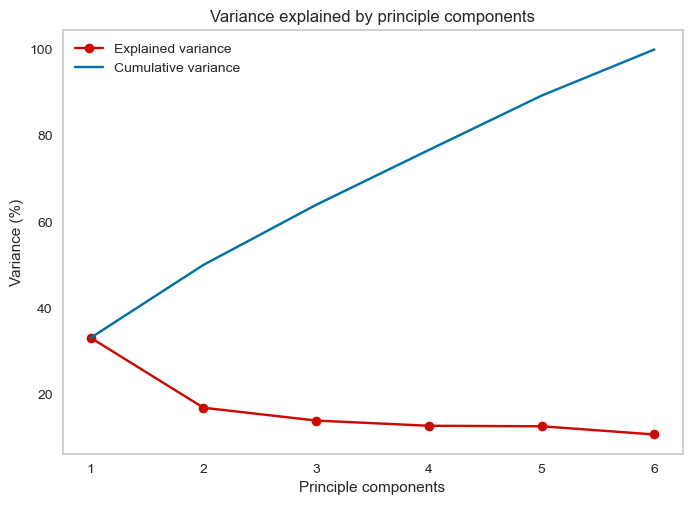

In [61]:
plt.plot(range(1, len(new_eig_values) + 1), explained_variance1, marker='o', label='Explained variance', color='r')
plt.plot(range(1, len(new_eig_values) + 1), cumulative_variance1, marker='x', label='Cumulative variance', color='b')
plt.xlabel('Principle components')
plt.ylabel('Variance (%)')
plt.title('Variance explained by principle components')
plt.legend()
plt.grid()
plt.show()

In [65]:
eig_values1 = pca2.explained_variance_
loadings = pca2.components_.T
correlations = loadings * np.sqrt(eig_values1)
correlations = pd.DataFrame(correlations, columns=[f"PC{i+1}" for i in range(len(pca2.components_))], index=df2.columns)
correlations

PC1       PC2       PC3       PC4       PC5  \
Gender                      0.177816 -0.451066  0.199905  0.161954  0.027979   
Age                        -0.135314  0.182226  0.720262 -0.236047  0.189703   
Occupation                 -0.001433 -0.155332  0.324986  0.009407  0.075257   
Stay_In_Current_City_Years  0.008816 -0.071205  0.008101  0.044754  0.057693   
Marital_Status             -0.049656  0.137463  0.664665 -0.257935  0.229252   
Product_Category           -0.035986  0.475842  0.117667  0.608236  0.265180   
Purchase                   -0.035654 -0.487482  0.004929 -0.606678 -0.214393   
Purchase_Sum                0.943796  0.086878  0.153887  0.053457 -0.223004   
Top1Cat                    -0.324831  0.712066  0.021218 -0.238173 -0.241514   
SpentonTop1                 0.904858 -0.071327  0.136652  0.036591 -0.176663   
Top2Cat                     0.116920 -0.514375  0.114715  0.273981  0.486332   
SpentonTop2                 0.885928  0.186726  0.128486  0.046021 -0.245516   
City_Category_B             0.347253  0.175548 -0.314892 -0.392025  0.661842   
City_Category_C            -0.673042 -0.236896  0.267692  0.254473 -0.380766   

                                 PC6  
Gender                     -0.385096  
Age                         0.050484  
Occupation                 -0.697249  
Stay_In_Current_City_Years -0.413751  
Marital_Status              0.223401  
Product_Category           -0.033354  
Purchase                    0.061591  
Purchase_Sum                0.046370  
Top1Cat                    -0.118725  
SpentonTop1                 0.021198  
Top2Cat                     0.367460  
SpentonTop2                 0.055964  
City_Category_B            -0.155437  
City_Category_C             0.074339

Clustering

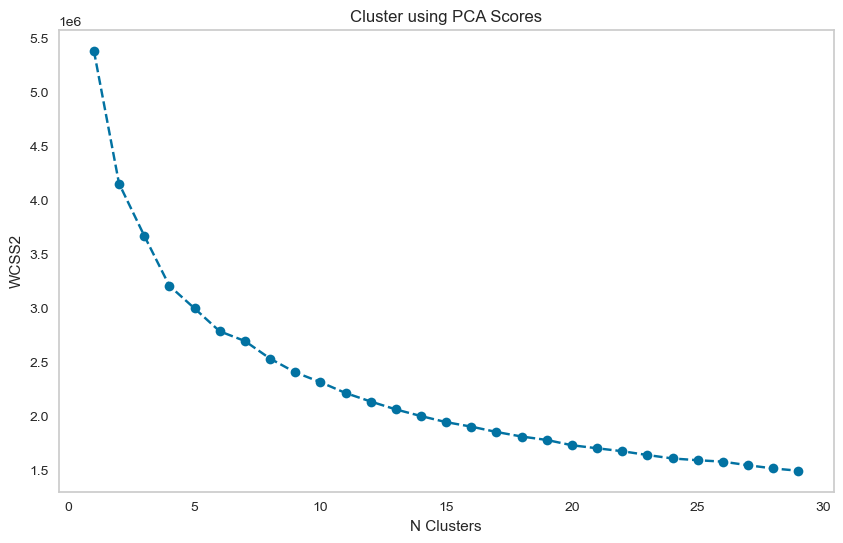

In [131]:
#Elbow Method
scores_pca2 = pca2.transform(scaled_data)
WCSS2 = []

for i in range(1,30):
  kmeans_pca2 = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca2.fit(scores_pca2)
  WCSS2.append(kmeans_pca2.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS2, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS2")
plt.xlabel("N Clusters")
plt.show()

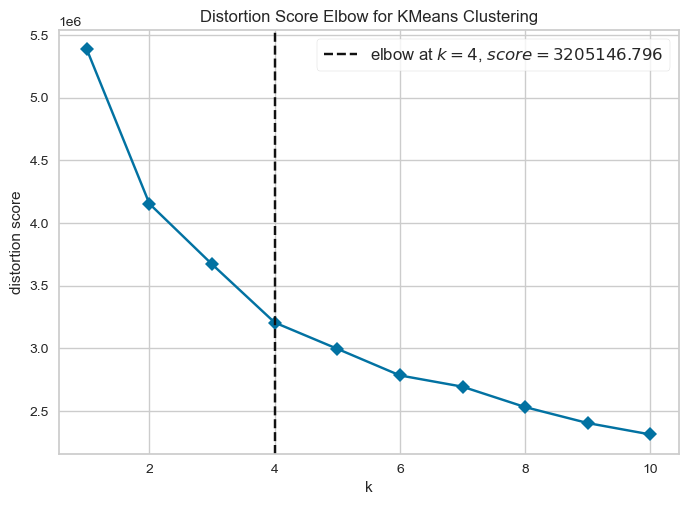

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
elbow_visualizer1 = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1, 11), timings=False)
elbow_visualizer1.fit(scores_pca2)
elbow_visualizer1.show()

In [135]:
subset_data = resample(scores_pca2, n_samples=int(0.1 * len(scores_pca2)), random_state=42)
subset_data

array([[ 0.52281417,  1.02049853, -0.24030844,  0.13110717, -0.29138726,
         1.81657063],
       [-1.79544699,  2.71115003, -2.57939101, -0.63516527,  0.31900885,
        -0.42199979],
       [-1.62560728,  1.87493658, -2.8160745 , -0.94747773,  0.27796917,
         0.36075617],
       ...,
       [ 0.82523681, -1.14172445,  2.29868684, -2.16845838,  1.6376438 ,
        -0.38447281],
       [-1.68224483, -0.57616228,  0.39986589,  0.72155422, -1.02886123,
        -0.98741539],
       [-0.76474765,  2.29627584, -0.33408512, -1.65275755,  0.60502691,
         0.53656496]])

In [145]:
sil_scores2 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(subset_data)
    score = silhouette_score(subset_data, cluster_labels)
    sil_scores2.append(score)

print(sil_scores2)

[0.209106352404303, 0.18758312788652495, 0.18409170035784886, 0.17783249549031502, 0.17053936195836847, 0.16286445741808758, 0.1694962289255194, 0.16673843601626068, 0.1600302572921874]


In [153]:
kmeans_pca2 = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
kmeans_pca2.fit(subset_data)

df_clust_pca_kmeans2 = pd.DataFrame(subset_data)

# Renaming the column label from each component
df_clust_pca_kmeans2.columns = [f"PC{i+1}" for i in range(6)]

# Seting the cluster label to each observation, using the atribute .labels_ 
df_clust_pca_kmeans2["cluster"] = kmeans_pca2.labels_

df_clust_pca_kmeans2["segment"] = df_clust_pca_kmeans2["cluster"].map({0:"Cluster 1", 1:"Cluster 2", 2:"Cluster 3", 3:"Cluster 4"})

In [155]:
df_clust2 = df_clust_pca_kmeans2.drop(columns='cluster', axis=1)

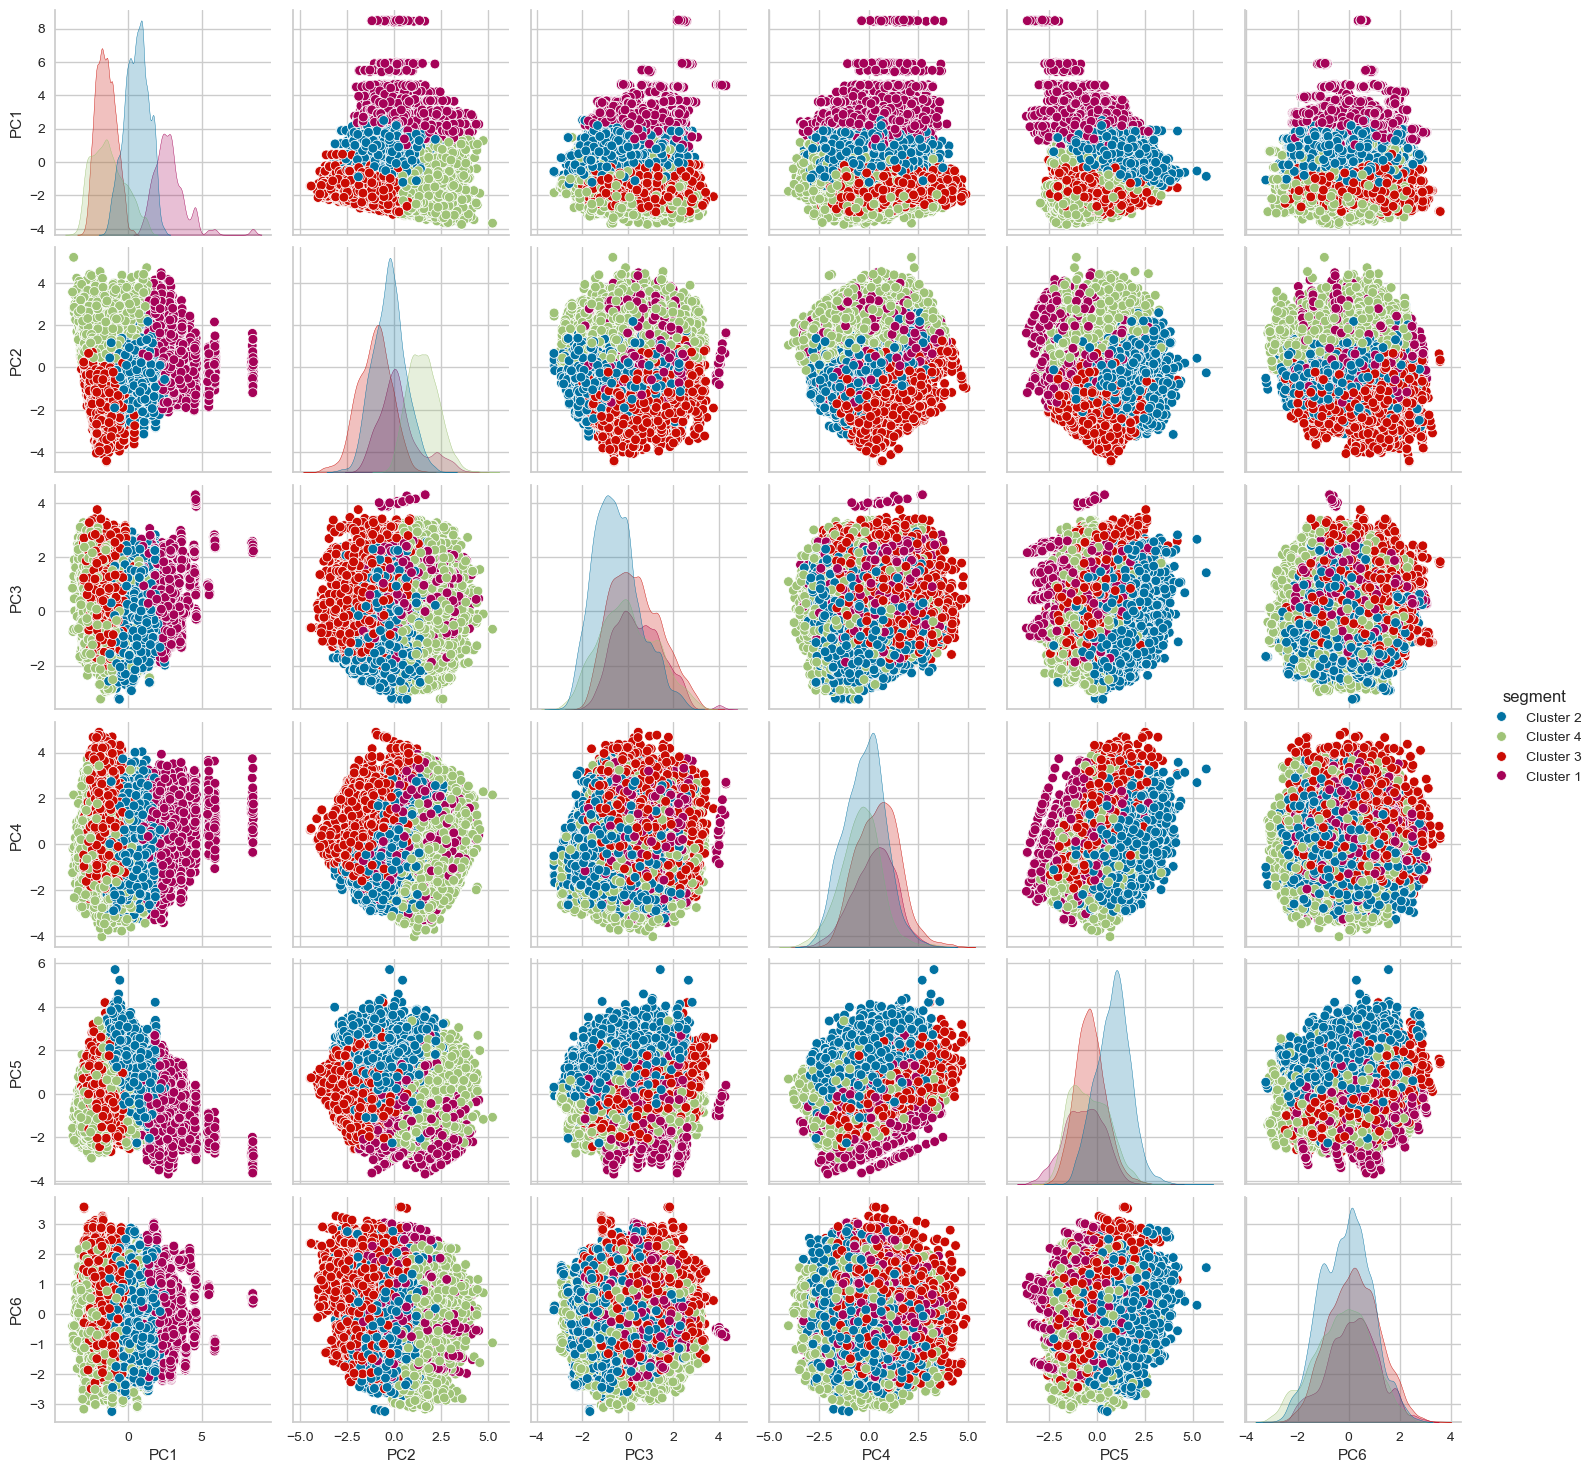

In [83]:
sns.pairplot(df_clust2[0:], hue='segment')

In [173]:
feature_names = ['PC1','PC2','PC3','PC4','PC5', 'PC6']

In [175]:
centroids = kmeans_pca2.cluster_centers_
print(centroids)

[[ 2.80901706  0.23465273  0.47093739  0.27400548 -0.69642489  0.17094877]
 [ 0.59305521 -0.28201622 -0.48854323 -0.21520556  0.82705732 -0.10314711]
 [-1.49682007 -1.06799817  0.34371136  0.48323438 -0.34698986  0.21089531]
 [-1.31404747  1.52054684 -0.00860501 -0.43056577 -0.39721027 -0.23585032]]


<Axes: >

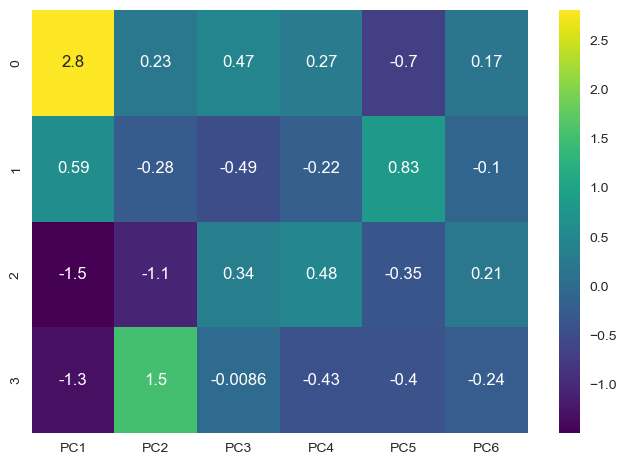

In [179]:
cluster_summary = pd.DataFrame(centroids, columns=feature_names)
sns.heatmap(cluster_summary, annot=True, cmap='viridis')